In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
print(df.describe())
print(df.isna().sum())
print("Columns with >5% nulls:")
print(df.isna().mean()[df.isna().mean() > 0.05])

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [5]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# Flag outliers as NaN within each column
for i, col in enumerate(numeric_cols):
    df.loc[z_scores[:, i] > 3, col] = np.nan

# Fill missing/outlier values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

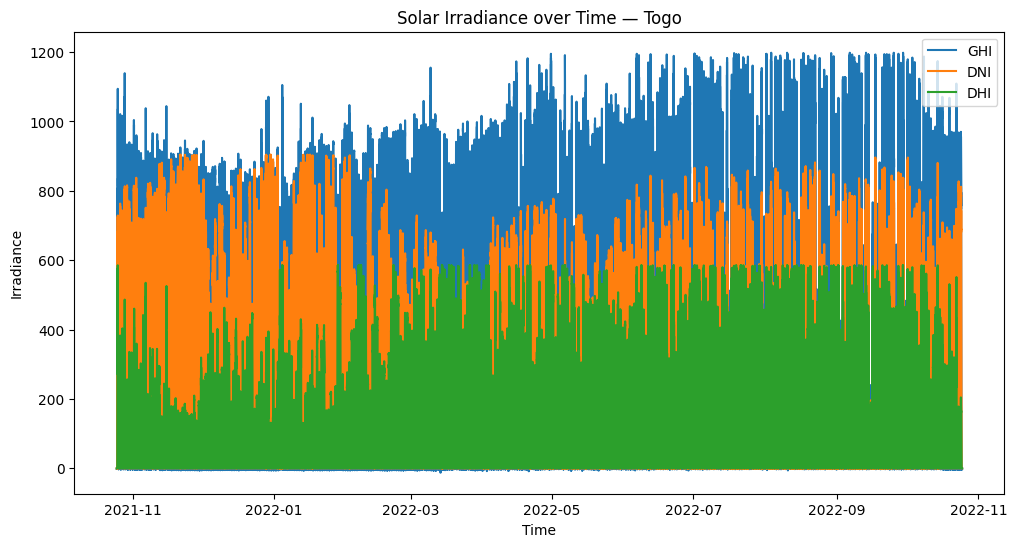

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 6️⃣ Time series plots
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.xlabel("Time")
plt.ylabel("Irradiance")
plt.title("Solar Irradiance over Time — Togo")
plt.legend(loc='upper right')  # specify location to avoid slow legend warning
plt.show()

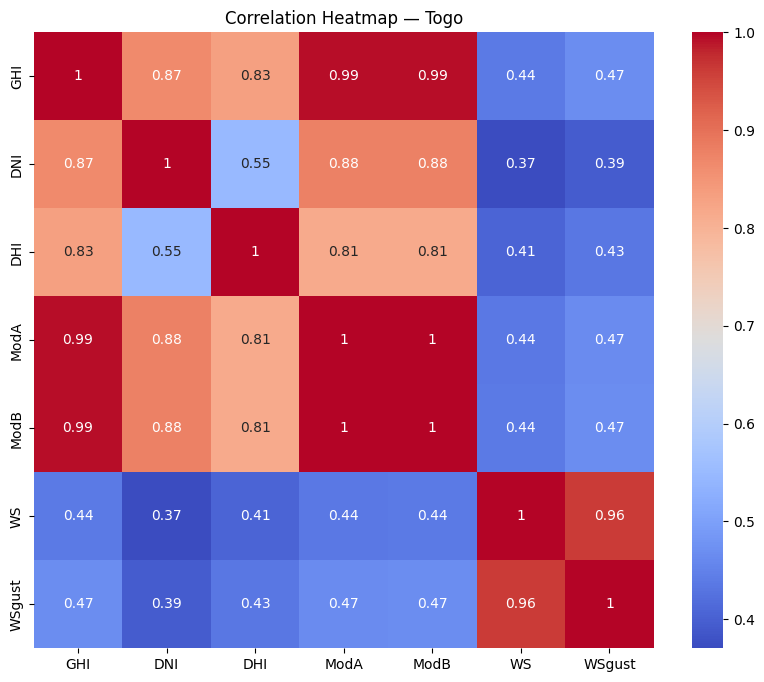

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap — Togo")
plt.show()

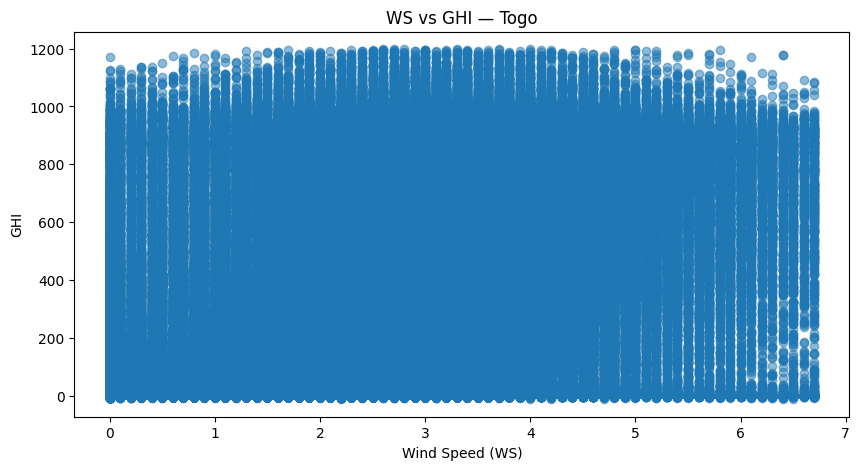

In [8]:
# Scatter plots (examples)
plt.figure(figsize=(10,5))
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel("Wind Speed (WS)")
plt.ylabel("GHI")
plt.title("WS vs GHI — Togo")
plt.show()

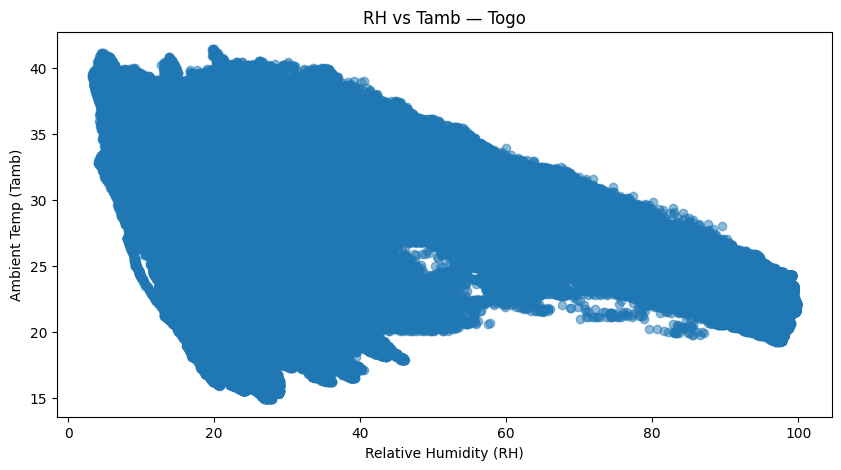

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("Ambient Temp (Tamb)")
plt.title("RH vs Tamb — Togo")
plt.show()

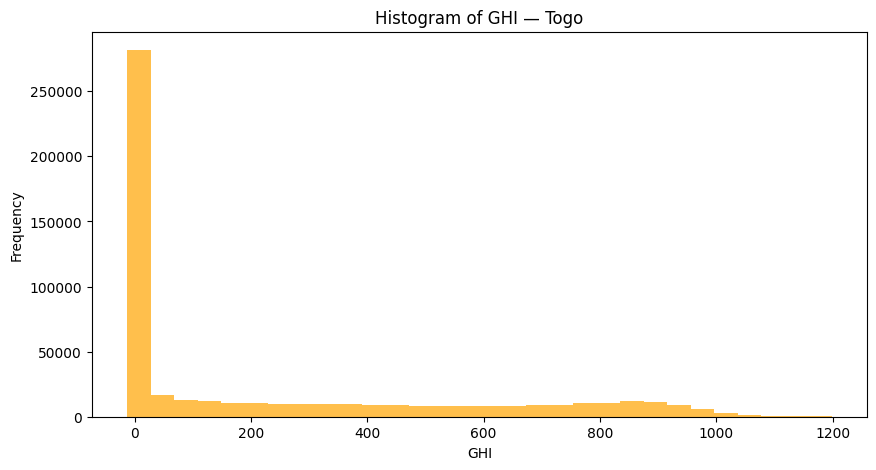

In [10]:
#Histograms
plt.figure(figsize=(10,5))
plt.hist(df['GHI'], bins=30, color='orange', alpha=0.7)
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.title("Histogram of GHI — Togo")
plt.show()

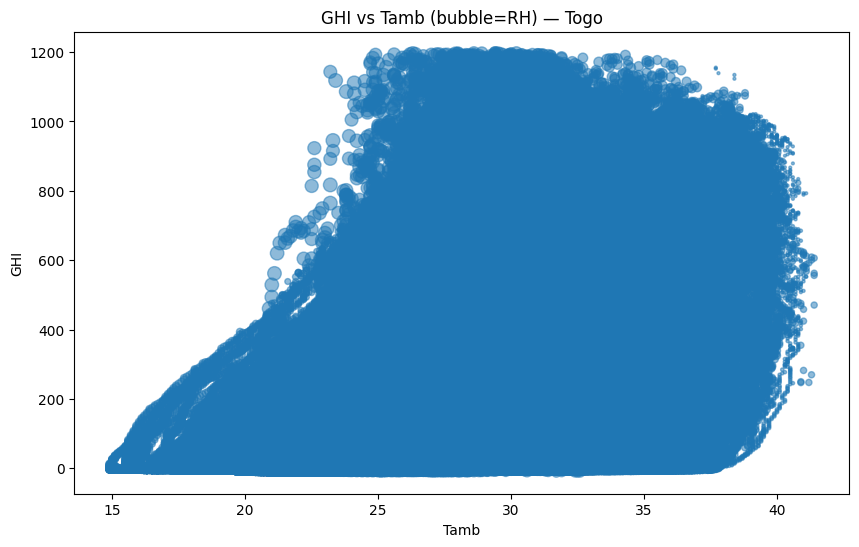

In [11]:
# Bubble chart (GHI vs Tamb, size=RH)
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
plt.xlabel("Tamb")
plt.ylabel("GHI")
plt.title("GHI vs Tamb (bubble=RH) — Togo")
plt.show()

In [13]:
df.to_csv("../data/togo_clean.csv", index=False)